In [ ]:
import pandas as pd
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df = pd.read_csv('train.csv')
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


### ПРЕПРОЦЕССИНГ

In [ ]:
#Посмотрим, какие колонки нам не нужны
for col in df.columns:
  print(f'{col} = ', df[col].nunique())

PassengerId =  8693
HomePlanet =  3
CryoSleep =  2
Cabin =  6560
Destination =  3
Age =  80
VIP =  2
RoomService =  1273
FoodCourt =  1507
ShoppingMall =  1115
Spa =  1327
VRDeck =  1306
Name =  8473
Transported =  2


In [ ]:
df = df.drop(['PassengerId', 'Cabin', 'Name', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], axis = 1)
df

,HomePlanet,CryoSleep,Destination,Age,VIP,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,False
1,Earth,False,TRAPPIST-1e,24.0,False,True
2,Europa,False,TRAPPIST-1e,58.0,True,False
3,Europa,False,TRAPPIST-1e,33.0,False,False
4,Earth,False,TRAPPIST-1e,16.0,False,True
...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,False
8689,Earth,True,PSO J318.5-22,18.0,False,False
8690,Earth,False,TRAPPIST-1e,26.0,False,True
8691,Europa,False,55 Cancri e,32.0,False,False


In [ ]:
#Ищем пропуски
df.info()
#Пропуски есть

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HomePlanet   8492 non-null   object 
 1   CryoSleep    8476 non-null   object 
 2   Destination  8511 non-null   object 
 3   Age          8514 non-null   float64
 4   VIP          8490 non-null   object 
 5   Transported  8693 non-null   bool   
dtypes: bool(1), float64(1), object(4)
memory usage: 348.2+ KB


In [ ]:
df.interpolate(inplace = True) #заполнили пропуски в числовых колонках
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HomePlanet   8492 non-null   object 
 1   CryoSleep    8476 non-null   object 
 2   Destination  8511 non-null   object 
 3   Age          8693 non-null   float64
 4   VIP          8490 non-null   object 
 5   Transported  8693 non-null   bool   
dtypes: bool(1), float64(1), object(4)
memory usage: 348.2+ KB


In [ ]:
num_cols = [col for col in df if df[col].dtype != "object"]  # числовые колонки
cat_cols = [col for col in df if df[col].dtype == "object"]  # категориальные колонки

#заменяем категоритальные колонки генерацией значений в зависимости от их частоты
for col in cat_cols:
  freq_table = df[col].value_counts(normalize = True)
  df[col].replace(np.nan, np.random.choice(freq_table.index, p = freq_table), inplace = True)

df.info()
#Пропусков больше нет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HomePlanet   8693 non-null   object 
 1   CryoSleep    8693 non-null   bool   
 2   Destination  8693 non-null   object 
 3   Age          8693 non-null   float64
 4   VIP          8693 non-null   bool   
 5   Transported  8693 non-null   bool   
dtypes: bool(3), float64(1), object(2)
memory usage: 229.3+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder #превращаем категориальные признаки в числовые
df[cat_cols] = df[cat_cols].apply(LabelEncoder().fit_transform)
df['Transported'] = df['Transported'].astype(int)
df

,HomePlanet,CryoSleep,Destination,Age,VIP,Transported
0,1,0,2,39.0,0,0
1,0,0,2,24.0,0,1
2,1,0,2,58.0,1,0
3,1,0,2,33.0,0,0
4,0,0,2,16.0,0,1
...,...,...,...,...,...,...
8688,1,0,0,41.0,1,0
8689,0,1,1,18.0,0,0
8690,0,0,2,26.0,0,1
8691,1,0,0,32.0,0,0


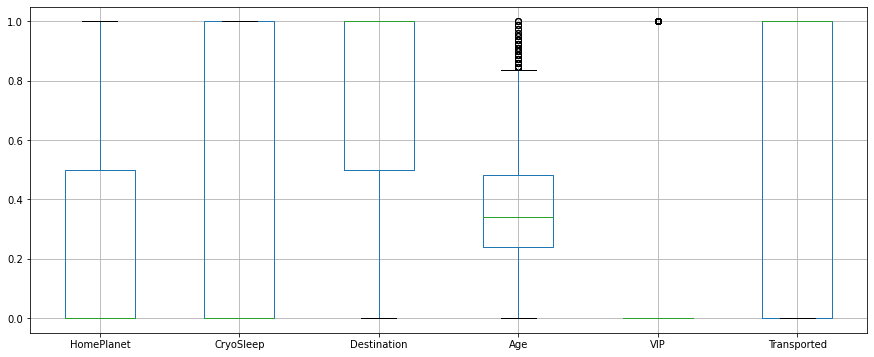

In [ ]:
# посмотрим на выбросы
from sklearn.preprocessing import MinMaxScaler
plt.rcParams["figure.figsize"] = 15, 6
pd.DataFrame(MinMaxScaler().fit_transform(df), columns=df.columns).boxplot();
# видим, что в колонках с продажами есть явный выброс. Его и сгладим, заменив на 
# предыдущее значение (следующее после максимума)

### Обучение модели

In [ ]:
df

,HomePlanet,CryoSleep,Destination,Age,VIP,Transported
0,1,0,2,39.0,0,0
1,0,0,2,24.0,0,1
2,1,0,2,58.0,1,0
3,1,0,2,33.0,0,0
4,0,0,2,16.0,0,1
...,...,...,...,...,...,...
8688,1,0,0,41.0,1,0
8689,0,1,1,18.0,0,0
8690,0,0,2,26.0,0,1
8691,1,0,0,32.0,0,0


In [ ]:
from sklearn.model_selection import train_test_split #разделение на трейн и тест выборку
X = df.drop('Transported', axis = 1)
y = df['Transported']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier #Используем главный алгоритм - рандом форест, дальше сравним точность с другими в метриках
from sklearn.model_selection import GridSearchCV
#параметры
parameters = {
    'max_depth':[3, 5, 10],
    'n_estimators':[10,100,200],
    'max_features':[1,3,5,7],
    'min_samples_leaf':[1,2,3],
    'min_samples_split':[1,2,3]
}
rf = RandomForestClassifier(criterion = 'entropy') #решающее дерево
grid = GridSearchCV(rf, parameters, cv = 5, scoring = 'accuracy') #Выбор лучших параметров
model_grid = grid.fit(X_train, y_train)

### Оценка точности

In [ ]:
rf.fit(X_train, y_train) #Обучение random forest
display(rf.score(X_train, y_train)) #Оценка точности просто randomforrest

0.772936439459304

In [ ]:
model_grid.best_score_ #Оценка точности random forest, но с использование gridsearch


0.7425942725330879

In [ ]:
from sklearn import svm #Support Vector Machines
vectorCLF = svm.SVC() #Обучение классификации
vectorCLF.fit(X_train, y_train)
display(rf.score(X_train, y_train)) #Оценка точности SVM

In [163]:
from sklearn.naive_bayes import GaussianNB #Нативный Байес
gnb = GaussianNB()
gnb.fit(X_train, y_train)
display(gnb.score(X_train, y_train))

0.7152717860224331

In [164]:
#Лучше всего - рандомные деревья

### Предсказания на тестовом

In [167]:
#Препроцессинг
df_test = pd.read_csv('test.csv')
df_test
df_test = df_test.drop(['PassengerId', 'Cabin', 'Name', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], axis = 1)
df_test.interpolate(inplace = True) 
numeric_cols = [col for col in df_test if df_test[col].dtype != "object"]  # числовые колонки
category_cols = [col for col in df_test if df_test[col].dtype == "object"]  # категориальные колонки
for col in category_cols:
  freq_table = df_test[col].value_counts(normalize = True)
  df_test[col].replace(np.nan, np.random.choice(freq_table.index, p = freq_table), inplace = True)
df_test[cat_cols] = df_test[category_cols].apply(LabelEncoder().fit_transform)
df_test.head(5)

,HomePlanet,CryoSleep,Destination,Age,VIP
0,0,1,2,27.0,0
1,0,0,2,19.0,0
2,1,1,0,31.0,0
3,1,0,2,38.0,0
4,0,0,2,20.0,0


In [168]:
#Получаем предсказания
y_pred_rf = rf.predict(df_test)

In [169]:
y_pred_rf

array([1, 0, 1, ..., 1, 1, 0])

### Транспорт в Kaggle

In [178]:
submission = pd.read_csv('sample_submission.csv')
submission['Transported'] = y_pred_rf
submission.head(5)


,PassengerId,Transported
0,0013_01,1
1,0018_01,0
2,0019_01,1
3,0021_01,0
4,0023_01,0


In [175]:
submission['Transported'] = submission['Transported'].astype(bool)
submission.head(5)

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,False


In [177]:
submission.to_csv('submission_rf_bool.csv', index = None)